<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/CustomerChurnPredictionUsingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Used is-https://github.com/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Churn_Modelling.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape  #Dataset has 10000 rows and 14 columns

(10000, 14)

In [5]:
df.info()  #Checking information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()  #Checking if any missing value is there or not

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Exited'].value_counts()  #Checking number of exited and non exited customers in the dataset
#7963 didnt exit
#2037 exited.

,count
Exited,
0,7963
1,2037


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#We feel that 1st 2nd and 3rd columns

df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
#REplacing true value as 1 anf false value as 0
df[['Geography_Germany', 'Geography_Spain','Gender_Male']] = df[['Geography_Germany', 'Geography_Spain','Gender_Male']].replace({False: 0, True: 1})


<ipython-input-16-4b5f29dc4f6c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Geography_Germany', 'Geography_Spain','Gender_Male']] = df[['Geography_Germany', 'Geography_Spain','Gender_Male']].replace({False: 0, True: 1})


In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [18]:
#Storing input features in x and output column in y
x=df.drop(columns=['Exited'])
y=df['Exited']

In [19]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train.shape  #There are 8000 rows for training the model

(8000, 11)

In [24]:
x_test.shape   #There are 2000 rows for testing the model

(2000, 11)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler() #This standardscaler function will make the column values such that its mean is 0 and variance is 1

In [27]:
x_train_scaled = scaler.fit_transform(x_train)

In [28]:
x_test_scaled = scaler.fit_transform(x_test)

In [29]:
x_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [30]:
x_test_scaled

array([[ 0.83007081, -0.0583534 ,  1.76317847, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [-0.06484497,  0.23487975, -1.0115688 , ...,  1.79427124,
        -0.58350885, -1.13620013],
       [-0.3458069 ,  1.7010455 ,  0.72264824, ..., -0.55732934,
        -0.58350885,  0.88012663],
       ...,
       [ 0.8716948 , -0.0583534 , -1.35841221, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [ 0.38261292,  0.03939099, -1.70525562, ..., -0.55732934,
        -0.58350885, -1.13620013],
       [ 0.72601083,  0.72360167, -1.35841221, ..., -0.55732934,
        -0.58350885,  0.88012663]])

**Neural Network Defination**

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
#Creating a object of sequential model in varible name seq_model
seq_model=Sequential()


In [33]:
#We will define one input layer , one hidden layer and one output layer

seq_model.add(Dense(11,activation='relu',input_dim = 11))
seq_model.add(Dense(11,activation='relu'))
seq_model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#This summery function will give the overall summery of the model defined
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

Model Compilation Stage

In [35]:
seq_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
#Now training the neural network on train data
history = seq_model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3877 - loss: 0.8394 - val_accuracy: 0.8100 - val_loss: 0.4785
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7924 - loss: 0.4786 - val_accuracy: 0.8263 - val_loss: 0.4216
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4439 - val_accuracy: 0.8256 - val_loss: 0.4078
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8186 - loss: 0.4224 - val_accuracy: 0.8369 - val_loss: 0.3974
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.4079 - val_accuracy: 0.8413 - val_loss: 0.3917
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 0.3959 - val_accuracy: 0.8519 - val_loss: 0.3787
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3947 - val_accuracy: 0.8512 - val_loss: 0.3670
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8425 - loss: 0.3765 - val_accu

In [37]:
#While compiling the neural network with a perticular number of epoch.
#What it does is it will give loss value after each epochs.

Compiling a model means that we are finding the values of weights and biases of the each node. After compiling the model,the weight and bias values will be stored in layers and can be retrived as follows:

In [38]:
seq_model.layers[0].get_weights()


[array([[ 0.01499311,  0.13637044,  0.58466077, -0.2325195 , -0.08339842,
          0.31349227,  0.29995343, -1.0909201 , -0.02463508,  0.07470872,
          0.03199739],
        [ 0.06638262, -0.723214  ,  0.4184097 , -0.27567878, -0.99469036,
          0.63549584,  0.40055028, -0.12529586, -0.12296262, -0.79420394,
         -0.20338129],
        [-0.1548525 , -0.49649668,  0.31213993, -0.01993924,  0.09734862,
         -0.04080061, -0.46374398, -0.6085337 , -0.02562874, -0.05426558,
         -0.08643031],
        [ 0.27552402,  0.31570873, -0.17243682,  0.01434923,  0.20256475,
         -0.04804213,  0.17589487,  0.00983886,  0.23000586, -0.44002157,
         -0.21987355],
        [ 0.59157777,  0.03253624,  0.16067079, -0.2721596 , -0.00347073,
          0.37909612,  0.33091134, -0.23556998,  1.1115804 ,  0.25079608,
         -1.3169956 ],
        [-0.08161131, -0.22176147, -0.31739652,  0.7879126 ,  0.10771036,
          0.5997518 ,  0.5260542 , -0.17069376,  0.00239436, -0.0956416

In [39]:
seq_model.layers[1].get_weights()


[array([[-0.05959786,  0.2561277 , -0.4579466 ,  0.36172697,  0.6280252 ,
          0.5392884 ,  0.22574326, -0.35595337,  0.7196907 ,  0.26535788,
         -0.17402564],
        [ 0.05818877, -0.25515252,  0.23283029, -0.05055125,  0.1419417 ,
         -0.06472177, -0.27848515,  0.60831547, -0.91454613,  0.24999   ,
         -0.4140704 ],
        [-0.19842269,  0.22445829, -0.03640483, -1.074708  ,  0.7573117 ,
         -0.3699923 ,  0.03750366,  0.16981629,  0.2484085 ,  0.01360008,
          0.22191802],
        [-0.5272137 , -0.25223053, -0.12635085, -0.18438506,  0.44610846,
          0.28488073, -0.1980725 ,  0.13806148, -0.27395037, -0.18725523,
         -0.19302101],
        [-0.23586792, -0.2934377 ,  0.35477626,  0.0271163 ,  0.48992196,
         -0.47548777,  0.23431015,  0.12155318, -0.8460097 , -1.0673039 ,
          0.20886068],
        [-0.45630145, -0.4233657 ,  0.12907325, -0.14508153,  0.250077  ,
          0.34101635,  0.12029783,  0.898616  , -0.19981045,  0.1149231

**Now Making the Prediction**

In [40]:
y_log=seq_model.predict(x_test_scaled)
#We will get the prediction for all the test data
#Here our is not 0 or 1 because we are using sigmoid activation function
#which maps the value from range 0 to 1
#We will decide the threshold value as 0.5 which means
#if the output value is more than 0.5 then the customer wont leave the bank
#Whereas if output value is less than 0.5 then the customer will leave the bank

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [41]:
y_pred=np.where(y_log>0.5,1,0)

In [42]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.853

**How can you increase the accuracy of your model?**

1)By changing the number of epochs

2)General obseration is that if we keep activation function of hidden layers as ReLU , we get better result.

3)We can increase the number of nodes in the hidden layer.


In [44]:
import matplotlib.pyplot as plt


In [45]:
history.history
 #This function will give all the logs of each epoch like accuracy,loss ,val_accuracy and val_loss

{'accuracy': [0.5860937237739563,
  0.7989062666893005,
  0.8129687309265137,
  0.8199999928474426,
  0.8278124928474426,
  0.8349999785423279,
  0.8410937786102295,
  0.8475000262260437,
  0.8514062762260437,
  0.854687511920929,
  0.8590624928474426,
  0.8589062690734863,
  0.8606250286102295,
  0.8596875071525574,
  0.8607812523841858,
  0.8596875071525574,
  0.8589062690734863,
  0.8621875047683716,
  0.8628125190734863,
  0.8618749976158142,
  0.859375,
  0.8629687428474426,
  0.8606250286102295,
  0.8621875047683716,
  0.8620312213897705,
  0.8629687428474426,
  0.8631250262260437,
  0.8657812476158142,
  0.8634374737739563,
  0.8634374737739563,
  0.8629687428474426,
  0.8639062643051147,
  0.8637499809265137,
  0.8621875047683716,
  0.8645312786102295,
  0.8648437261581421,
  0.8621875047683716,
  0.8634374737739563,
  0.8648437261581421,
  0.8653125166893005,
  0.864062488079071,
  0.8662499785423279,
  0.8657812476158142,
  0.8648437261581421,
  0.8656250238418579,
  0.864531

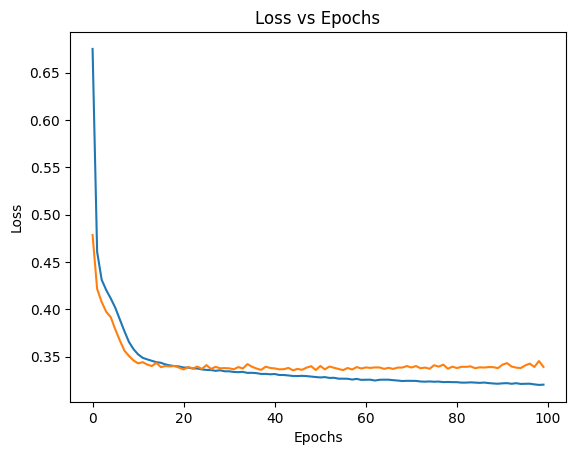

In [46]:
#Now we will draw graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

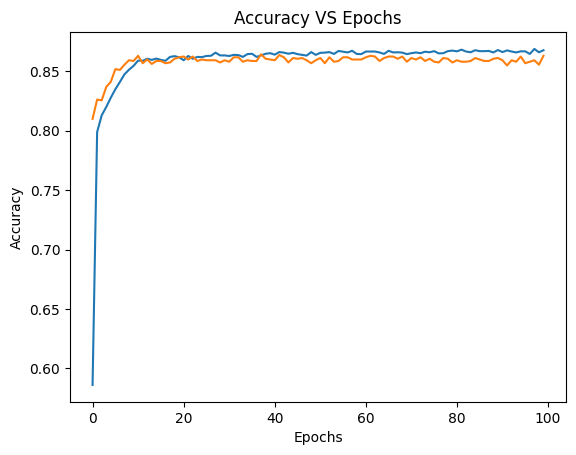

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Epochs')
plt.show()